In [11]:
# https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/open-MODIS-hdf4-files-python/
# conda install -c conda-forge earthpy
# conda install -c conda-forge geopandas
# conda install -c conda-forge shapely
# conda install //anaconda.org/conda-forge/rioxarray/0.3.1/downlohttps://anaconda.org/conda-forge/rioxarray/0.3.1/download/noarch/rioxarray-0.3.1-pyhd8ed1ab_0.tar.bz2


In [8]:
# Import packages
import os
import warnings

import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep

warnings.simplefilter('ignore')

In [10]:
# Get the MODIS data
et.data.get_data('cold-springs-modis-h4')

# This download is for the fire boundary
et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))
#Downloading from https://ndownloader.figshare.com/files/10960112
#Extracted output to /root/earth-analytics/data/cold-springs-modis-h4/.

Extracted output to /home/manmeet/earth-analytics/data/cold-springs-modis-h4/.
Extracted output to /home/manmeet/earth-analytics/data/cold-springs-fire/.


In [12]:
# Create a path to the pre-fire MODIS h4 data
modis_pre_path = os.path.join("cold-springs-modis-h4",
                              "07_july_2016",
                              "MOD09GA.A2016189.h09v05.006.2016191073856.hdf")
modis_pre_path

'cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf'

In [13]:
# Open data with rioxarray
modis_pre = rxr.open_rasterio(modis_pre_path,
                              masked=True)
type(modis_pre)

list

In [14]:
# This is just a data exploration step
modis_pre_qa = modis_pre[0]
modis_pre_qa

<xarray.Dataset>
Dimensions:               (band: 1, x: 1200, y: 1200)
Coordinates:
  * y                     (y) float64 4.447e+06 4.446e+06 ... 3.336e+06
  * x                     (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
  * band                  (band) int64 1
    spatial_ref           int64 0
Data variables:
    num_observations_1km  (band, y, x) float64 ...
    granule_pnt_1         (band, y, x) float64 ...
    state_1km_1           (band, y, x) float64 ...
    SensorZenith_1        (band, y, x) float64 ...
    SensorAzimuth_1       (band, y, x) float64 ...
    Range_1               (band, y, x) float64 ...
    SolarZenith_1         (band, y, x) float64 ...
    SolarAzimuth_1        (band, y, x) float64 ...
    gflags_1              (band, y, x) float64 ...
    orbit_pnt_1           (band, y, x) float64 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [15]:
modis_pre_qa["num_observations_1km"]

<xarray.DataArray 'num_observations_1km' (band: 1, y: 1200, x: 1200)>
[1440000 values with dtype=float64]
Coordinates:
  * y            (y) float64 4.447e+06 4.446e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.897e+06 -8.896e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     Number of Observations
    units:         none

In [16]:
# Reflectance data
modis_pre_bands = modis_pre[1]
modis_pre_bands

<xarray.Dataset>
Dimensions:                (band: 1, x: 2400, y: 2400)
Coordinates:
  * y                      (y) float64 4.448e+06 4.447e+06 ... 3.336e+06
  * x                      (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
  * band                   (band) int64 1
    spatial_ref            int64 0
Data variables:
    num_observations_500m  (band, y, x) float64 ...
    sur_refl_b01_1         (band, y, x) float64 ...
    sur_refl_b02_1         (band, y, x) float64 ...
    sur_refl_b03_1         (band, y, x) float64 ...
    sur_refl_b04_1         (band, y, x) float64 ...
    sur_refl_b05_1         (band, y, x) float64 ...
    sur_refl_b06_1         (band, y, x) float64 ...
    sur_refl_b07_1         (band, y, x) float64 ...
    QC_500m_1              (band, y, x) float64 ...
    obscov_500m_1          (band, y, x) float64 ...
    iobs_res_1             (band, y, x) float64 ...
    q_scan_1               (band, y, x) float64 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [17]:
# Use rasterio to print all of the subdataset names in the data
# Here you can see the group names: MODIS_Grid_500m_2D & MODIS_Grid_1km_2D
import rasterio as rio
with rio.open(modis_pre_path) as groups:
    for name in groups.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_1km_2D:num_observations_1km
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_1km_2D:granule_pnt_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:num_observations_500m
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b01_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b02_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b03_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b04_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4/07_july_2016/MOD09G

In [18]:
# Subset by group only - Notice you have all bands in the returned object
rxr.open_rasterio(modis_pre_path,
                  masked=True,
                  group="MODIS_Grid_500m_2D").squeeze()

<xarray.Dataset>
Dimensions:                (x: 2400, y: 2400)
Coordinates:
  * y                      (y) float64 4.448e+06 4.447e+06 ... 3.336e+06
  * x                      (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
    band                   int64 1
    spatial_ref            int64 0
Data variables:
    num_observations_500m  (y, x) float64 ...
    sur_refl_b01_1         (y, x) float64 ...
    sur_refl_b02_1         (y, x) float64 ...
    sur_refl_b03_1         (y, x) float64 ...
    sur_refl_b04_1         (y, x) float64 ...
    sur_refl_b05_1         (y, x) float64 ...
    sur_refl_b06_1         (y, x) float64 ...
    sur_refl_b07_1         (y, x) float64 ...
    QC_500m_1              (y, x) float64 ...
    obscov_500m_1          (y, x) float64 ...
    iobs_res_1             (y, x) float64 ...
    q_scan_1               (y, x) float64 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [19]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]
# Notice that here, you get a single xarray object with just the bands that
# you want to work with
modis_pre_bands = rxr.open_rasterio(modis_pre_path,
                                    variable=desired_bands).squeeze()
modis_pre_bands

<xarray.Dataset>
Dimensions:         (x: 2400, y: 2400)
Coordinates:
  * y               (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x               (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band            int64 1
    spatial_ref     int64 0
Data variables:
    sur_refl_b01_1  (y, x) int16 ...
    sur_refl_b02_1  (y, x) int16 ...
    sur_refl_b03_1  (y, x) int16 ...
    sur_refl_b04_1  (y, x) int16 ...
    sur_refl_b07_1  (y, x) int16 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [20]:
#  view nodata value
modis_pre_bands.sur_refl_b01_1.rio.nodata

-28672

In [21]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]
# Notice that here, you get a single xarray object with just the bands that
# you want to work with
modis_pre_bands = rxr.open_rasterio(modis_pre_path,
                                    masked=True,
                                    variable=desired_bands).squeeze()
modis_pre_bands

<xarray.Dataset>
Dimensions:         (x: 2400, y: 2400)
Coordinates:
  * y               (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x               (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band            int64 1
    spatial_ref     int64 0
Data variables:
    sur_refl_b01_1  (y, x) float64 ...
    sur_refl_b02_1  (y, x) float64 ...
    sur_refl_b03_1  (y, x) float64 ...
    sur_refl_b04_1  (y, x) float64 ...
    sur_refl_b07_1  (y, x) float64 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [22]:
# Now your nodata value returns a NAN as it has been masked
# and accounted for
modis_pre_bands.sur_refl_b01_1.rio.nodata

nan

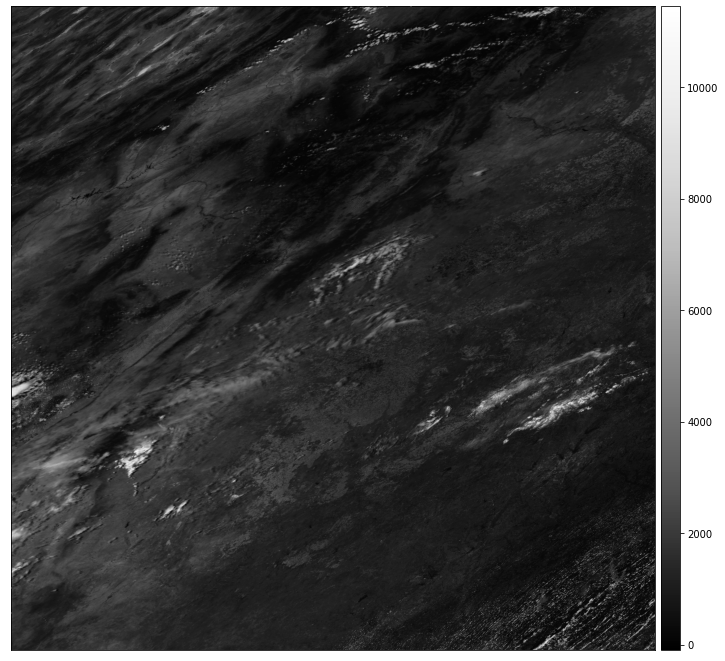

In [23]:
# Plot band one of the data
ep.plot_bands(modis_pre_bands.sur_refl_b01_1)
plt.show()

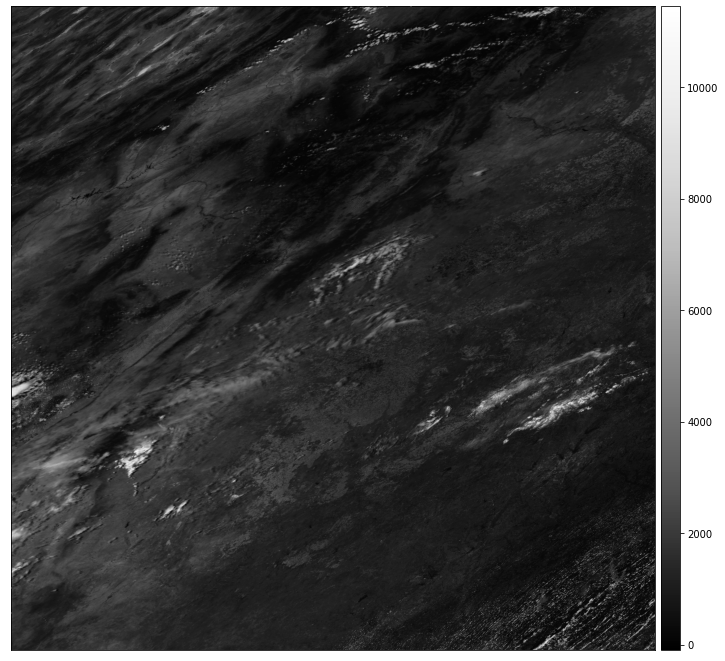

In [24]:
# Note that you can also call the data variable by name
ep.plot_bands(modis_pre_bands["sur_refl_b01_1"])
plt.show()

In [25]:
print(type(modis_pre_bands))
print(type(modis_pre_bands.to_array()))

# You can plot each band easily using a data array object
modis_pre_bands.to_array()

xarray.core.dataset.Dataset
<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray (variable: 5, y: 2400, x: 2400)>
array([[[1902., 1949., 1947., ..., 1327., 1327., 1181.],
        [1949., 2160., 2095., ..., 1327., 1273., 1273.],
        [2054., 2156., 2187., ..., 1139., 1101., 1206.],
        ...,
        [1387., 1469., 1469., ...,  343.,  499., 1006.],
        [1298., 1316., 1469., ...,  905.,  499.,  436.],
        [1316., 1316., 1454., ...,  905.,  578.,  351.]],

       [[2714., 2859., 3041., ..., 3046., 3046., 4421.],
        [2968., 3362., 3253., ..., 3046., 4550., 4550.],
        [3198., 3315., 3246., ..., 4178., 4017., 3992.],
        ...,
        [2911., 2947., 2947., ..., 4059., 4907., 3799.],
        [2954., 2890., 2947., ..., 4517., 4907., 3459.],
        [2890., 2890., 2935., ..., 4517., 3728., 4021.]],

       [[1056., 1072., 1012., ...,  745.,  745.,  581.],
        [1051., 1150., 1039., ...,  745.,  595.,  595.],
        [1073., 1220., 1152., ...,  588.,  564.,  563.],
        ...,
        [ 759.,  813.,  813., ...,  150.,  218.,  852.],
        [ 703.,  735.,  813., ...,  585.,  218.,  199.],
        [ 735.,  735.,  798., ...,  585.,  338.,  109.]],

       [[1534., 1567., 1527., ..., 1107., 1107., 1069.],
        [1548., 1776., 1665., ..., 1107., 1121., 1121.],
        [1696., 1813., 1820., ..., 1029., 1018., 1077.],
        ...,
        [1209., 1267., 1267., ...,  597.,  788., 1153.],
        [1165., 1154., 1267., ..., 1089.,  788.,  603.],
        [1154., 1154., 1231., ..., 1089.,  759.,  516.]],

       [[2781., 2692., 2801., ..., 2260., 2260., 1534.],
        [2792., 2705., 2684., ..., 2260., 1449., 1449.],
        [2747., 2754., 2733., ..., 1713., 1802., 1548.],
        ...,
        [2457., 2446., 2446., ...,  444.,  832., 1379.],
        [2289., 2296., 2446., ..., 1161.,  832.,  762.],
        [2296., 2296., 2511., ..., 1161.,  913.,  703.]]])
Coordinates:
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band         int64 1
    spatial_ref  int64 0
  * variable     (variable) <U14 'sur_refl_b01_1' ... 'sur_refl_b07_1'
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

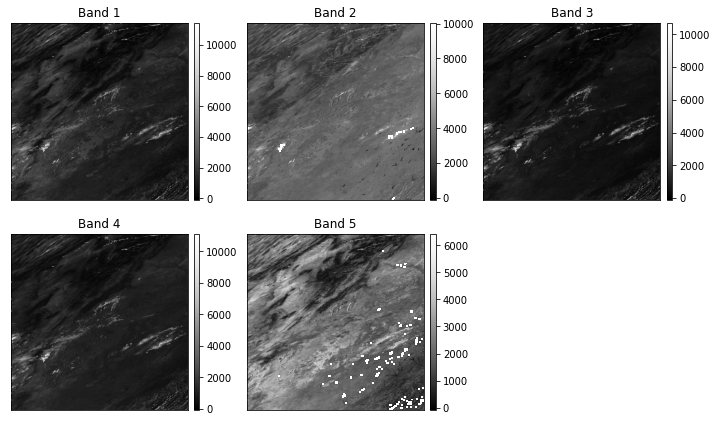

In [26]:
# Plot the data as a DataArray
# This is only a data exploration step
ep.plot_bands(modis_pre_bands.to_array().values,
              figsize=(10, 6))
plt.show()

In [27]:
# Select the rgb bands only
rgb_bands = ['sur_refl_b01_1',
             'sur_refl_b03_1',
             'sur_refl_b04_1']
# Turn the data into a DataArray
modis_rgb_xr = modis_pre_bands[rgb_bands].to_array()
modis_rgb_xr

<xarray.DataArray (variable: 3, y: 2400, x: 2400)>
array([[[1902., 1949., 1947., ..., 1327., 1327., 1181.],
        [1949., 2160., 2095., ..., 1327., 1273., 1273.],
        [2054., 2156., 2187., ..., 1139., 1101., 1206.],
        ...,
        [1387., 1469., 1469., ...,  343.,  499., 1006.],
        [1298., 1316., 1469., ...,  905.,  499.,  436.],
        [1316., 1316., 1454., ...,  905.,  578.,  351.]],

       [[1056., 1072., 1012., ...,  745.,  745.,  581.],
        [1051., 1150., 1039., ...,  745.,  595.,  595.],
        [1073., 1220., 1152., ...,  588.,  564.,  563.],
        ...,
        [ 759.,  813.,  813., ...,  150.,  218.,  852.],
        [ 703.,  735.,  813., ...,  585.,  218.,  199.],
        [ 735.,  735.,  798., ...,  585.,  338.,  109.]],

       [[1534., 1567., 1527., ..., 1107., 1107., 1069.],
        [1548., 1776., 1665., ..., 1107., 1121., 1121.],
        [1696., 1813., 1820., ..., 1029., 1018., 1077.],
        ...,
        [1209., 1267., 1267., ...,  597.,  788., 1153.],
        [1165., 1154., 1267., ..., 1089.,  788.,  603.],
        [1154., 1154., 1231., ..., 1089.,  759.,  516.]]])
Coordinates:
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band         int64 1
    spatial_ref  int64 0
  * variable     (variable) <U14 'sur_refl_b01_1' ... 'sur_refl_b04_1'
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [28]:
def clean_array_plot(xr_obj):
    # This function takes a single xarray object as an input and produces a
    # cleaned numpy array output for plotting
    # BEGIN SOLUTION
    """
    Take an  xarray object and replace null  values with a mask for plotting

    Parameters
    ----------
    xr_obj : xarray object

    Returns
    -------
    A masked numpy array 

    """
    # END SOLUTION

    return ma.masked_array(xr_obj.values,  xr_obj.isnull())

In [29]:
# For plotting you will want to clean up masked values
# Note that this is not a numpy array
modis_arr = clean_array_plot(modis_rgb_xr)
modis_arr

masked_array(
  data=[[[1902.0, 1949.0, 1947.0, ..., 1327.0, 1327.0, 1181.0],
         [1949.0, 2160.0, 2095.0, ..., 1327.0, 1273.0, 1273.0],
         [2054.0, 2156.0, 2187.0, ..., 1139.0, 1101.0, 1206.0],
         ...,
         [1387.0, 1469.0, 1469.0, ..., 343.0, 499.0, 1006.0],
         [1298.0, 1316.0, 1469.0, ..., 905.0, 499.0, 436.0],
         [1316.0, 1316.0, 1454.0, ..., 905.0, 578.0, 351.0]],

        [[1056.0, 1072.0, 1012.0, ..., 745.0, 745.0, 581.0],
         [1051.0, 1150.0, 1039.0, ..., 745.0, 595.0, 595.0],
         [1073.0, 1220.0, 1152.0, ..., 588.0, 564.0, 563.0],
         ...,
         [759.0, 813.0, 813.0, ..., 150.0, 218.0, 852.0],
         [703.0, 735.0, 813.0, ..., 585.0, 218.0, 199.0],
         [735.0, 735.0, 798.0, ..., 585.0, 338.0, 109.0]],

        [[1534.0, 1567.0, 1527.0, ..., 1107.0, 1107.0, 1069.0],
         [1548.0, 1776.0, 1665.0, ..., 1107.0, 1121.0, 1121.0],
         [1696.0, 1813.0, 1820.0, ..., 1029.0, 1018.0, 1077.0],
         ...,
         [1209.

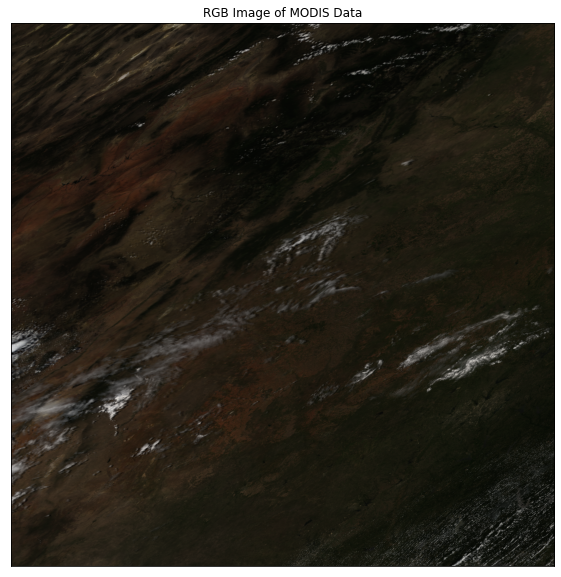

In [30]:
# Plot MODIS RGB numpy image array
ep.plot_rgb(modis_arr,
            rgb=[0, 2, 1],
            title='RGB Image of MODIS Data')

plt.show()

In [31]:
# Open fire boundary
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# Check the CRS of your study area extent
fire_boundary.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [32]:
# Check CRS
if not fire_boundary.crs == modis_rgb_xr.rio.crs:
    # If the crs is not equal reproject the data
    fire_bound_sin = fire_boundary.to_crs(modis_rgb_xr.rio.crs)

fire_bound_sin.crs

<Projected CRS: PROJCS["unnamed",GEOGCS["Unknown datum based upon  ...>
Name: unnamed
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Sinusoidal
Datum: Not specified (based on custom spheroid)
- Ellipsoid: Custom spheroid
- Prime Meridian: Greenwich

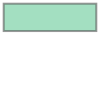

In [33]:
# Notice this is a box - representing the spatial extent
# of your study area
crop_bound_box = [box(*fire_boundary.total_bounds)]
crop_bound_box[0]

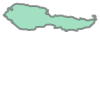

In [34]:
# Notice that this is the actual shape of the fire boundary
# First you need to decide whether you want to clip to the
# Box /  extent (above) or the shape that you see here.
fire_boundary.geometry[0]

In [35]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

#  Create a box representing the spatial extent of your data
crop_bound_box = [box(*fire_boundary.total_bounds)]
# Clip the data by  chaining together rio.clip with rio.open_rasterio
# from_disk=True allows you to only open the data that you wish to work with
modis_pre_clip = rxr.open_rasterio(modis_pre_path,
                                   masked=True,
                                   variable=desired_bands).rio.clip(crop_bound_box,
                                                                    crs=fire_boundary.crs,
                                                                    # Include all pixels even partial pixels
                                                                    all_touched=True,
                                                                    from_disk=True).squeeze()
# The final clipped data
modis_pre_clip

<xarray.Dataset>
Dimensions:         (x: 12, y: 3)
Coordinates:
  * y               (y) float64 4.446e+06 4.446e+06 4.445e+06
  * x               (x) float64 -8.989e+06 -8.989e+06 ... -8.985e+06 -8.984e+06
    band            int64 1
    spatial_ref     int64 0
Data variables:
    sur_refl_b01_1  (y, x) float64 nan nan 428.0 450.0 ... 458.0 nan nan nan
    sur_refl_b02_1  (y, x) float64 nan nan 3.013e+03 2.809e+03 ... nan nan nan
    sur_refl_b03_1  (y, x) float64 nan nan 259.0 235.0 ... 265.0 nan nan nan
    sur_refl_b04_1  (y, x) float64 nan nan 563.0 541.0 ... 518.0 nan nan nan
    sur_refl_b07_1  (y, x) float64 nan nan 832.0 820.0 ... 804.0 nan nan nan
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [36]:
# For demonstration purpposes  i'm creating a plotting extent
from rasterio.plot import plotting_extent

modis_ext = plotting_extent(modis_pre_clip.to_array().values[0],
                            modis_pre_clip.rio.transform())

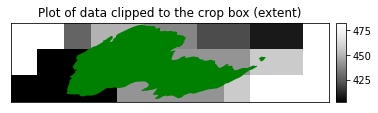

In [37]:
# View cropped data
f, ax = plt.subplots()
ep.plot_bands(modis_pre_clip.to_array().values[0],
              ax=ax,
              extent=modis_ext,
              title="Plot of data clipped to the crop box (extent)")
fire_bound_sin.plot(ax=ax,
                    color="green")
plt.show()

In [38]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

#  Create a box representing the spatial extent of your data
crop_bound_box = [box(*fire_boundary.total_bounds)]
# Clip the data by  chaining together rio.clip with rio.open_rasterio
# from_disk=True allows you to only open the data that you wish to work with
modis_pre_clip_geom = rxr.open_rasterio(modis_pre_path,
                                   masked=True,
                                   variable=desired_bands).rio.clip(fire_boundary.geometry.apply(mapping),
                                                                    crs=fire_boundary.crs,
                                                                    # Include all pixels even partial pixels
                                                                    all_touched=True,
                                                                    from_disk=True).squeeze()
# The final clipped data  -  Notice there are fewer pixels
# In the output object
modis_pre_clip_geom

<xarray.Dataset>
Dimensions:         (x: 8, y: 3)
Coordinates:
  * y               (y) float64 4.446e+06 4.446e+06 4.445e+06
  * x               (x) float64 -8.988e+06 -8.988e+06 ... -8.986e+06 -8.985e+06
    band            int64 1
    spatial_ref     int64 0
Data variables:
    sur_refl_b01_1  (y, x) float64 428.0 450.0 450.0 438.0 ... 442.0 458.0 nan
    sur_refl_b02_1  (y, x) float64 3.013e+03 2.809e+03 ... 2.496e+03 nan
    sur_refl_b03_1  (y, x) float64 259.0 235.0 235.0 231.0 ... 230.0 265.0 nan
    sur_refl_b04_1  (y, x) float64 563.0 541.0 541.0 528.0 ... 476.0 518.0 nan
    sur_refl_b07_1  (y, x) float64 832.0 820.0 820.0 820.0 ... 789.0 804.0 nan
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

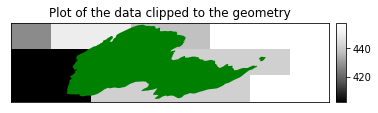

In [39]:
# View cropped data  - note the  different b etew
f, ax = plt.subplots()
ep.plot_bands(modis_pre_clip_geom.to_array().values[0],
              ax=ax,
              extent=modis_ext,
              title="Plot of the data clipped to the geometry")
fire_bound_sin.plot(ax=ax,
                    color="green")
plt.show()

In [40]:
# Open the data but don't clip just yet
modis_bands = rxr.open_rasterio(modis_pre_path,
                                masked=True,
                                variable=desired_bands)

# Reproject the fire boundary
fire_boundary_sin = fire_boundary.to_crs(modis_bands.rio.crs)

modis_bands_clip = modis_bands.rio.clip([box(*fire_bound_sin.total_bounds)],
                                        all_touched=True,
                                        from_disk=True).squeeze()
modis_bands_clip

<xarray.Dataset>
Dimensions:         (x: 8, y: 3)
Coordinates:
  * y               (y) float64 4.446e+06 4.446e+06 4.445e+06
  * x               (x) float64 -8.988e+06 -8.988e+06 ... -8.986e+06 -8.985e+06
    band            int64 1
    spatial_ref     int64 0
Data variables:
    sur_refl_b01_1  (y, x) float64 428.0 450.0 450.0 438.0 ... 442.0 458.0 458.0
    sur_refl_b02_1  (y, x) float64 3.013e+03 2.809e+03 ... 2.496e+03 2.496e+03
    sur_refl_b03_1  (y, x) float64 259.0 235.0 235.0 231.0 ... 230.0 265.0 265.0
    sur_refl_b04_1  (y, x) float64 563.0 541.0 541.0 528.0 ... 476.0 518.0 518.0
    sur_refl_b07_1  (y, x) float64 832.0 820.0 820.0 820.0 ... 789.0 804.0 804.0
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

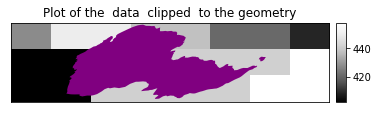

In [41]:
# View cropped data
f, ax = plt.subplots()
ep.plot_bands(modis_bands_clip.to_array().values[0],
              ax=ax,
              extent=modis_ext,
              title="Plot of the  data  clipped  to the geometry")
fire_bound_sin.plot(ax=ax,
                    color="purple")
plt.show()

In [42]:
def open_clean_bands(band_path,
                     crop_bound,
                     valid_range=None,
                     variable=None):
    """Open, subset and crop a MODIS h4 file.

    Parameters
    -----------
    band_path : string 
        A path to the array to be opened.
    crop_bound : geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rioxarray clip().
    valid_range:tuple (optional)
        A tuple of min and max range of values for the data. Default = None.
    variable : List
        A list of variables to be opened from the raster.

    Returns
    -----------
    band : xarray DataArray
        Cropped xarray DataArray
    """

    crop_bound_box = [box(*crop_bound.total_bounds)]

    try:
        band = rxr.open_rasterio(band_path,
                                 masked=True,
                                 variable=variable).rio.clip(crop_bound_box,
                                                             crs=crop_bound.crs,
                                                             all_touched=True,
                                                             from_disk=True).squeeze()
    except:
        raise ValueError(
            "Oops - I couldn't clip your data. This may be due to a crs error.")

    # Only mask the data to the valid range if a valid range tuple is provided
    if valid_range is not None:
        mask = ((band < valid_range[0]) | (band > valid_range[1]))
        band = band.where(~xr.where(mask, True, False))

    return band

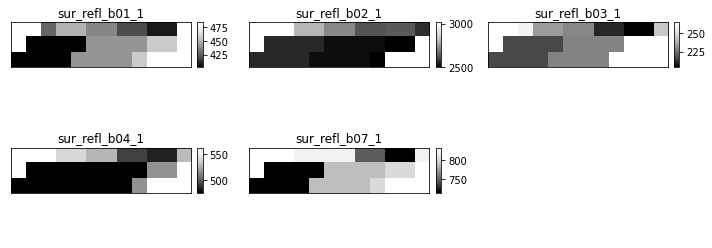

In [43]:
# Open bands with function
clean_bands = open_clean_bands(band_path=modis_pre_path,
                               crop_bound=fire_boundary,
                               valid_range=(0, 10000),
                               variable=desired_bands)

# Plot bands opened with function
ep.plot_bands(clean_bands.to_array().values,
              title=desired_bands,
              figsize=(10, 4))

plt.show()

In [44]:
# Define path and file name for new tif file
stacked_file_path = os.path.join(os.path.dirname(modis_pre_path),
                                 "final_output",
                                 "modis_band_1.tif")

# Get the directory needed for the defined path
modis_dir_path = os.path.dirname(stacked_file_path)
print("Directory to save path:", modis_dir_path)

# Create the directory if it does not exist
if not os.path.exists(modis_dir_path):
    os.mkdir(modis_dir_path)
    print("The directory", modis_dir_path, "does not exist - creating it now.")

Directory to save path: cold-springs-modis-h4/07_july_2016/final_output
The directory cold-springs-modis-h4/07_july_2016/final_output does not exist - creating it now.


In [45]:
# Here you decide how much of the data you want to export.
# A single layer vs a stacked / array
# Export a single band to a geotiff
clean_bands.rio.to_raster(stacked_file_path)

In [46]:
# Open the file to make sure it looks ok
modis_b1_xr = rxr.open_rasterio(stacked_file_path,
                                masked=True)

modis_b1_xr.rio.crs, modis_b1_xr.rio.nodata

(CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not_specified_based_on_custom_spheroid",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 None)

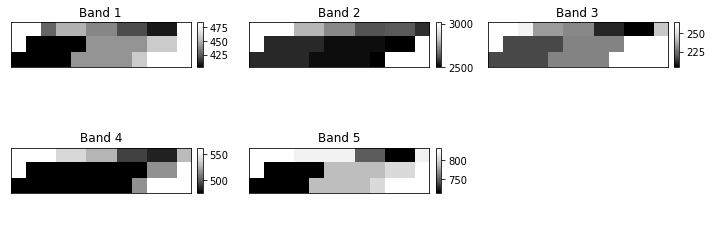

In [47]:
# Plot the data
ep.plot_bands(modis_b1_xr,
              figsize=(10, 4))

plt.show()